<a href="https://colab.research.google.com/github/TanushreeBose26/data-projects/blob/main/Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.rcParams['font.size']=14
plt.rcParams['axes.grid']=True
plt.rcParams['figure.figsize'] = (5,5)

We will see the highest corelation of the variables with our target column Price.

In [ ]:
bos = pd.read_csv('BostonHousing.csv')
bos.head()

,crime_rate,industrial_perc,close_to_charles_river,nitric_oxide,avg_num_rooms,age,dist_frm_employment_center,pupil_teacher_ratio,perc_low_income_group,avg_house_price
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,15.3,4.98,24.0
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,17.8,9.14,21.6
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,17.8,4.03,34.7
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,18.7,2.94,33.4
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,18.7,5.33,36.2


we are going tocreat the correlation of all our variables with our target column 'Price'.
Lets choose one best column to create simple linear relation with Avg House Price


In [ ]:
bos.corrwith(bos.avg_house_price)

crime_rate                   -0.388305
industrial_perc              -0.483725
close_to_charles_river        0.175260
nitric_oxide                 -0.427321
avg_num_rooms                 0.695360
age                          -0.376955
dist_frm_employment_center    0.249929
pupil_teacher_ratio          -0.507787
perc_low_income_group        -0.737663
avg_house_price               1.000000
dtype: float64

The column which has the highest corelation with our target variable is perc_low_income_group (as we take the absolute value)

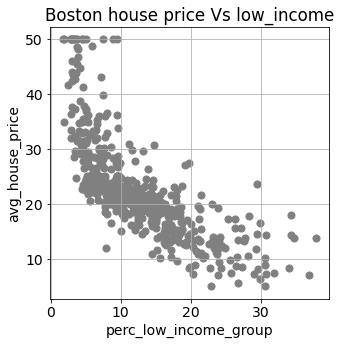

In [ ]:
plt.scatter(bos.perc_low_income_group, bos.avg_house_price, c='grey', marker = 'o', s=50)
plt.xlabel('perc_low_income_group')
plt.ylabel('avg_house_price')
plt.title('Boston house price Vs low_income')
plt.show()

It's not a perfect line as the points are scattered around.

For the equation y=mx+c+error, we will see the best fit line.

we will see which value has the We will randomely choose three different values of the variable which has the highest correlation with our target variable.

Let's find the best fit line (equation) given the data

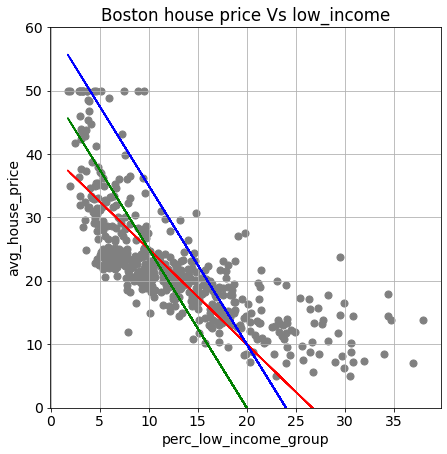

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(bos.perc_low_income_group, bos.avg_house_price, c='grey', marker = 'o', s=50)
y_pred = -1.5*bos.perc_low_income_group + 40
plt.plot(bos.perc_low_income_group, y_pred, c='r')
y_pred = -2.5*bos.perc_low_income_group + 60
plt.plot(bos.perc_low_income_group, y_pred, c='b')
y_pred = -2.5*bos.perc_low_income_group + 50
plt.plot(bos.perc_low_income_group, y_pred, c='g')

plt.ylim((0, 60))
plt.xlabel('perc_low_income_group')
plt.ylabel('avg_house_price')
plt.title('Boston house price Vs low_income')
plt.show()

The way to find the best line is to see which line has the least amount of errors.
The best fit line will pass through the mean of the X and Y value.

Let's get the mean of X and Y

In [ ]:
x_mean = bos.perc_low_income_group.mean()
x_mean

12.653063241106722

In [ ]:
y_mean = bos.avg_house_price.mean()
y_mean

22.532806324110677

Now we will add the X and Y mean to our scatter plot and get the point and denote it with a star.

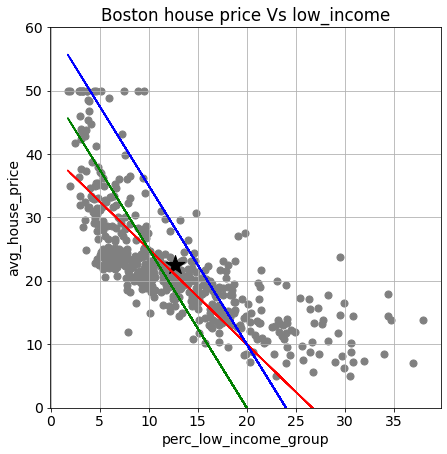

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(bos.perc_low_income_group, bos.avg_house_price, c='grey', marker = 'o', s=50)
y_pred = -1.5*bos.perc_low_income_group + 40
plt.plot(bos.perc_low_income_group, y_pred, c='r')
y_pred = -2.5*bos.perc_low_income_group + 60
plt.plot(bos.perc_low_income_group, y_pred, c='b')
y_pred = -2.5*bos.perc_low_income_group + 50
plt.plot(bos.perc_low_income_group, y_pred, c='g')
plt.scatter(x_mean, y_mean, c='k', marker = '*', s=400)

plt.ylim((0, 60))
plt.xlabel('perc_low_income_group')
plt.ylabel('avg_house_price')
plt.title('Boston house price Vs low_income')
plt.show()

hence we can see that our best fit line is red which is passing through the star.

Now let's solve the slope.


In [ ]:
cov_mat = np.cov(bos.perc_low_income_group, bos.avg_house_price, ddof=1)
cov_mat

array([[ 50.99475951, -48.44753832],
       [-48.44753832,  84.58672359]])

*The first value 50.9947 tells us the variance of perc_low_income_group.

*-48.447 is the covariance of the avg_house_price.

*In second line -48.447 is again the covariance of the perc_low_income_group.

*and the second line second value 84.5867 is the variance of avg_house_income.

In [ ]:
m = cov_mat[0, 1] / cov_mat[0, 0]
m

-0.950049353757991

The above is our slope value.

In [ ]:
c = y_mean - m*x_mean
c

34.55384087938311

The above is our intercept value.

**Now, let's plot the final graph** 

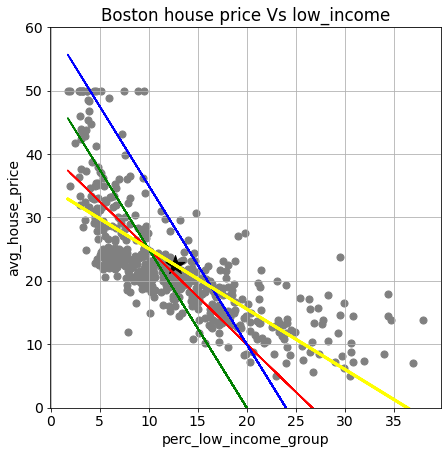

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(bos.perc_low_income_group, bos.avg_house_price, c='grey', marker = 'o', s=50)
y_pred = -1.5*bos.perc_low_income_group + 40
plt.plot(bos.perc_low_income_group, y_pred, c='r')
y_pred = -2.5*bos.perc_low_income_group + 60
plt.plot(bos.perc_low_income_group, y_pred, c='b')
y_pred = -2.5*bos.perc_low_income_group + 50
plt.plot(bos.perc_low_income_group, y_pred, c='g')

y_pred = m*bos.perc_low_income_group + c # Our final prediction
plt.plot(bos.perc_low_income_group, y_pred, c='yellow', lw =3)

plt.scatter(x_mean, y_mean, c='k', marker = '*', s=400)

plt.ylim((0, 60))
plt.xlabel('perc_low_income_group')
plt.ylabel('avg_house_price')
plt.title('Boston house price Vs low_income')
plt.show()

Here, yellow line is our final line. it is the line with the lease no. of errors. and it is passing through the star we plotted.

**Lets evaluate the quality of our prediction**

In [ ]:
y_actual = bos.avg_house_price
y_pred = m*bos.perc_low_income_group + c # Our final prediction
n = len(y_actual)

In [ ]:
mse = np.sum((y_actual-y_pred)**2)/n
mse

38.48296722989415

In [ ]:
mae = np.sum(np.abs(y_actual-y_pred))/n
mae

4.505281166250568

In [ ]:
rmse = np.sqrt(mse)
rmse

6.20346413142642

In [ ]:
ssr = np.sum((y_pred- y_mean)**2)
sse = np.sum((y_actual-y_pred)**2)
sst = np.sum((y_actual-y_mean)**2)

In [ ]:
r_square  = ssr/sst
r_square

0.5441462975864798

In [ ]:
r_square  = ssr/(ssr +sse)
r_square

0.5441462975864798

In [ ]:
r_square  = 1-(sse/sst)
r_square

0.5441462975864797

Let's see other variables now.

In [ ]:
import statsmodels.formula.api as SM

In [ ]:
formula_MLR ='avg_house_price~crime_rate+industrial_perc+close_to_charles_river+nitric_oxide+avg_num_rooms+age+dist_frm_employment_center+pupil_teacher_ratio+perc_low_income_group'

In [ ]:
model = SM.ols(formula = formula_MLR, data=bos).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        avg_house_price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     141.1
Date:                Mon, 05 Sep 2022   Prob (F-statistic):          1.09e-130
Time:                        11:47:22   Log-Likelihood:                -1518.9
No. Observations:                 506   AIC:                             3058.
Df Residuals:                     496   BIC:                             3100.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     34.7144      4.633      7.492      0.000      25.611      43.818
crime_rate                    -0.0659      0.030     -2.203      0.028      -0.125      -0.007
industrial_perc               -0.0568      0.057     -1.000      0.318      -0.168       0.055
close_to_charles_river         3.1947      0.885      3.610      0.000       1.456       4.933
nitric_oxide                 -15.8670      3.695     -4.294      0.000     -23.126      -8.608
avg_num_rooms                  4.1799      0.416     10.036      0.000       3.362       4.998
age                           -0.0064      0.013     -0.475      0.635      -0.033       0.020
dist_frm_employment_center    -1.2439      0.187     -6.637      0.000      -1.612      -0.876
pupil_teacher_ratio           -0.9269      0.119     -7.816      0.000      -1.160      -0.694
perc_low_income_group         -0.5322      0.052    -10.289      0.000      -0.634      -0.431
==============================================================================
Omnibus:                      192.569   Durbin-Watson:                   1.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              936.024
Skew:                           1.623   Prob(JB):                    5.56e-204
Kurtosis:                       8.819   Cond. No.                     1.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* avg_num_rooms has positive coefficient as expected.
* perc_low_income_group has negative coefficient.
* here we cant directly compare the coefficient value of nitric_oxide with the price because it has decimal values and avg_house_price has tens values as well. as we have not scaled our values.


In [ ]:
rsqr = model.rsquared
rsqr

0.7191918531783886

In [ ]:
n

506

In [ ]:
k = 9

In [ ]:
rsqr_adj = 1 - ( (1-rsqr)* (n-1)/(n-k-1) )
rsqr_adj

0.7140965440626739

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        avg_house_price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     141.1
Date:                Mon, 05 Sep 2022   Prob (F-statistic):          1.09e-130
Time:                        11:48:39   Log-Likelihood:                -1518.9
No. Observations:                 506   AIC:                             3058.
Df Residuals:                     496   BIC:                             3100.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     34.7144      4.633      7.492      0.000      25.611      43.818
crime_rate                    -0.0659      0.030     -2.203      0.028      -0.125      -0.007
industrial_perc               -0.0568      0.057     -1.000      0.318      -0.168       0.055
close_to_charles_river         3.1947      0.885      3.610      0.000       1.456       4.933
nitric_oxide                 -15.8670      3.695     -4.294      0.000     -23.126      -8.608
avg_num_rooms                  4.1799      0.416     10.036      0.000       3.362       4.998
age                           -0.0064      0.013     -0.475      0.635      -0.033       0.020
dist_frm_employment_center    -1.2439      0.187     -6.637      0.000      -1.612      -0.876
pupil_teacher_ratio           -0.9269      0.119     -7.816      0.000      -1.160      -0.694
perc_low_income_group         -0.5322      0.052    -10.289      0.000      -0.634      -0.431
==============================================================================
Omnibus:                      192.569   Durbin-Watson:                   1.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              936.024
Skew:                           1.623   Prob(JB):                    5.56e-204
Kurtosis:                       8.819   Cond. No.                     1.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
residuals = model.resid

In [ ]:
predictions = model.predict(bos)

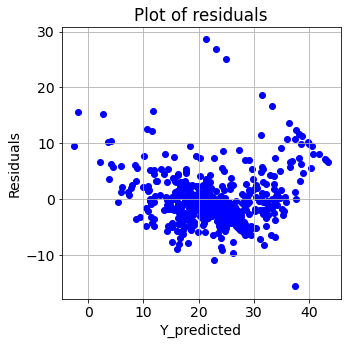

In [ ]:
plt.scatter(predictions, residuals, c='blue')
plt.title('Plot of residuals')
plt.xlabel('Y_predicted')
plt.ylabel('Residuals')
plt.show()

*we can see cetain pattern here.
*the variance is different in each zone. its called homoscedesticity.
*multi collinearity is there, its not good.


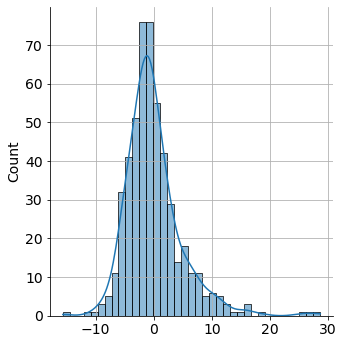

In [ ]:
sns.displot(residuals, kde = True)
plt.show()

* distribution of residual is very important.

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        avg_house_price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     141.1
Date:                Mon, 05 Sep 2022   Prob (F-statistic):          1.09e-130
Time:                        11:50:15   Log-Likelihood:                -1518.9
No. Observations:                 506   AIC:                             3058.
Df Residuals:                     496   BIC:                             3100.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     34.7144      4.633      7.492      0.000      25.611      43.818
crime_rate                    -0.0659      0.030     -2.203      0.028      -0.125      -0.007
industrial_perc               -0.0568      0.057     -1.000      0.318      -0.168       0.055
close_to_charles_river         3.1947      0.885      3.610      0.000       1.456       4.933
nitric_oxide                 -15.8670      3.695     -4.294      0.000     -23.126      -8.608
avg_num_rooms                  4.1799      0.416     10.036      0.000       3.362       4.998
age                           -0.0064      0.013     -0.475      0.635      -0.033       0.020
dist_frm_employment_center    -1.2439      0.187     -6.637      0.000      -1.612      -0.876
pupil_teacher_ratio           -0.9269      0.119     -7.816      0.000      -1.160      -0.694
perc_low_income_group         -0.5322      0.052    -10.289      0.000      -0.634      -0.431
==============================================================================
Omnibus:                      192.569   Durbin-Watson:                   1.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              936.024
Skew:                           1.623   Prob(JB):                    5.56e-204
Kurtosis:                       8.819   Cond. No.                     1.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# New Section